# Code validation

**Validation status: <font color="green">PASSED!</font>**

**Commit: [1a9dd097db08235a6181bd28b15c51e6fb440c5f](https://github.com/leowerneck/Tabulated_EOS_IllinoisGRMHD/commit/1a9dd097db08235a6181bd28b15c51e6fb440c5f)**

These notes are intended to show partial validations of the modifications we are making to the `IllinoisGRMHD` thorn and its dependencies (`ID_converter_ILGRMHD` and `Convert_to_HydroBase`).

# Key modifications

Major modifications, in particular cleanups, to the conservative-to-primitive routines have been performed. While we already started adding tabulated EOS related stuff, our goal here is to make sure that the modifications we made to the code do not break it. Some modifications highlights:

1. Updated inlined functions to work with Hybrid and Tabulated EOS
1. Further updates to con2prim interface
1. Completed 90%+ of the modifications to the MHD evolution
1. Many updates to function prototypes (adding, e.g., restrict to most pointers)
1. Added new tabulated EOS interpolators
1. Further additions to EOS parameter struct

# Test details

Our code validation test consists of the Binary Neutron Star run on a adaptive mesh refinement (AMR) grid with 4 refinement levels. We compare results between the trusted version of the code and the new version of the code, demonstrating agreement between the two during the first 1000 time integration steps (a 4th order Runge-Kutta time integrator is used).

Details:

* **Test type**: Hybrid EOS vs Hybrid EOS (standard evolution)
* **ETK version**: ET_2020_11

* **Trusted IGM version**: nrpytutorial (Jan 24, 2020)

* **Tested IGM version**: Tabulated_EOS_IllinoisGRMHD (see commit version above)

* **Initial data file**: LORENE equal mass BNS with 1.4 solar masses and 50km initial separation (available [here](https://ccrgpages.rit.edu/~jfaber/BNSID/Data/Sly/Sly_1.4_1.4/), file `resu_5.000000e+01_1.550000e+00_1.550000e+00.d`)

* **Parameter file**: available in output directories of this validation test

# Validation results

We present results for the minimum lapse and maximum baryon density as a function of time. We also show the BNS trajectories.

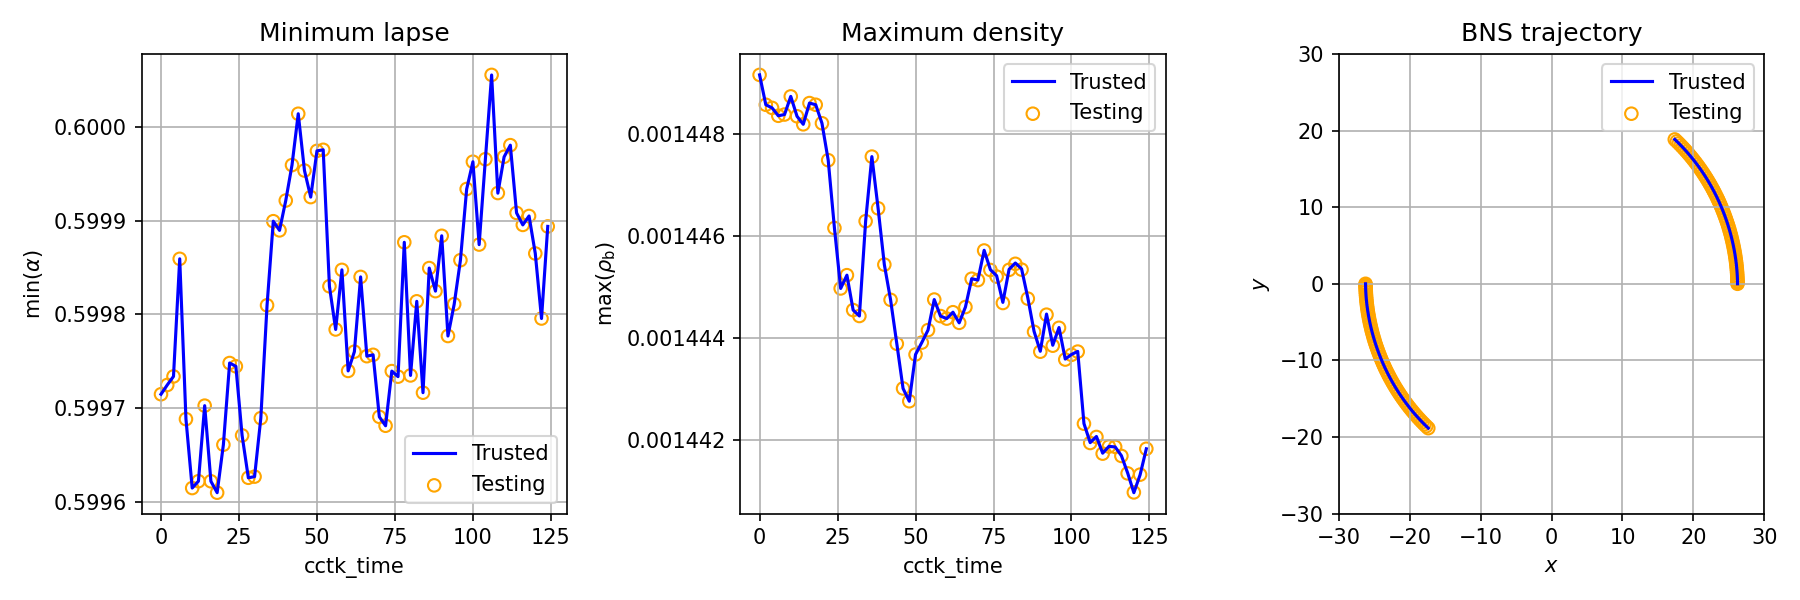

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# Get current working directory
base_dir    = os.getcwd()

# Now set the output directories, which contains
# results from the trusted version of the code
# and the version we are currently testing
dir_trusted = os.path.join(base_dir,"..","out_trusted")
dir_testing = os.path.join(base_dir,"out_test3")

# Read in the data files
alp_trusted = np.loadtxt(os.path.join(dir_trusted,"alp.minimum.asc")).T
alp_testing = np.loadtxt(os.path.join(dir_testing,"alp.minimum.asc")).T

rho_trusted = np.loadtxt(os.path.join(dir_trusted,"rho_b.maximum.asc")).T
rho_testing = np.loadtxt(os.path.join(dir_testing,"rho_b.maximum.asc")).T

trj_trusted = np.loadtxt(os.path.join(dir_trusted,"volume_integrals-GRMHD.asc")).T
trj_testing = np.loadtxt(os.path.join(dir_testing,"volume_integrals-GRMHD.asc")).T

# Generate the plots
fig,ax = plt.subplots(ncols=3,dpi=150,figsize=(12,4))

ax[0].set_title("Minimum lapse")
ax[0].set_xlabel("cctk_time")
ax[0].set_ylabel(r"$\min\left(\alpha\right)$")
ax[0].plot(alp_trusted[1],alp_trusted[2],c="blue",ls="-",label="Trusted")
ax[0].scatter(alp_testing[1],alp_testing[2],ec="orange",fc="none",marker="o",label="Testing")
ax[0].legend()
ax[0].grid()

ax[1].set_title("Maximum density")
ax[1].set_xlabel("cctk_time")
ax[1].set_ylabel(r"$\max\left(\rho_{\rm b}\right)$")
ax[1].plot(rho_trusted[1],rho_trusted[2],c="blue",ls="-",label="Trusted")
ax[1].scatter(rho_testing[1],rho_testing[2],ec="orange",fc="none",marker="o",label="Testing")
ax[1].legend()
ax[1].grid()

ax[2].set_xlim(-30,30)
ax[2].set_ylim(-30,30)
ax[2].set_title("BNS trajectory")
ax[2].set_xlabel(r"$x$")
ax[2].set_ylabel(r"$y$")
ax[2].plot(trj_trusted[2],trj_trusted[3],c="blue",ls="-",label="Trusted")
ax[2].plot(trj_trusted[7],trj_trusted[8],c="blue",ls="-")
ax[2].scatter(trj_trusted[2],trj_trusted[3],ec="orange",fc="none",marker="o",label="Testing")
ax[2].scatter(trj_trusted[7],trj_trusted[8],ec="orange",fc="none",marker="o")
ax[2].legend()
ax[2].grid()

plt.tight_layout()
plt.savefig("validation.png",dpi=150,facecolor="white")
plt.close(fig)
Image("validation.png")